In [138]:

# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)



The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [162]:
%%time
# reading csv data given from file and load to data frame
confirmation_data = pd.read_csv("filtered_contents_confirmation.csv")
# copying orignal data so that when changing data we dont lose original
data = confirmation_data.copy()

CPU times: user 1.24 s, sys: 48.4 ms, total: 1.29 s
Wall time: 1.29 s


<IPython.core.display.Javascript object>

In [163]:
# fixing column names
data.columns = [c.replace(" ", "_") for c in data.columns]

<IPython.core.display.Javascript object>

In [164]:
data.head(5)

,Date,Hotel_Brand,CRR_Test_Context_(evar141),Purchase_IDs,Login_Status_(evar7),Analytics_Reporting,Browser_Type,GeoSegmentation_Countries,GeoSegmentation_Cities,GeoSegmentation_States,Campaign,Campaign_Id,Campaign_Type,Control_vs_Targeted,Control_Experience,#_of_Adults_Searched_(evar21),#_of_Children_Searched_(evar22),#_of_Rooms_Searched_(evar23),Accessible,Appliances,Bathroom_Amenities,Length_of_Stay_(evar110),Page_Type,Platform_(evar1),Member_Level_(evar82),Rewards_Club_Tier,New_vs._Returning_Visitors_(prop8),Bookings,Revenue,Room_Nights_Booked,Room_Rate,PCR_Cash_+_Point_Bookings_(event23),PCR_Point_Bookings_(event21),Normal_Reward_Club_Enrollments_(event123),Quick_Enrollments_(event155),Quick_Reward_Club_Enrollments_(event102)
0,"January 20, 2022",IN,rooms,22996703-21/2022/01,EXPLICIT,a4t,google,united states,cumming,georgia (united states),[WL-Only] TAO 2022-04 – CRR Traffic Controller...,685617,NaN,NaN,0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,Reservation Confirmation,large:landscape,CLUB--,Club,NaN,1,79.0,1,0,0,0,0,0,0
1,"January 21, 2022",NaN,select-roomrate,NaN,EXPLICIT,a4t,google,united states,atlanta,georgia (united states),[WL-Only] TAO 2022-04 – CRR Traffic Controller...,685617,NaN,NaN,0,4.0,0.0,2.0,NaN,NaN,NaN,1.0,Reservation Confirmation,large:landscape,NA--,NaN,NaN,0,0.0,0,0,0,0,0,0,0
2,"January 21, 2022",NaN,select-roomrate,NaN,EXPLICIT,a4t,google,united states,atlanta,georgia (united states),[WL-Only]TAO 2022-04 – Rooms Vs CRR​ Exp. B - ...,685618,NaN,NaN,0,4.0,0.0,2.0,NaN,NaN,NaN,1.0,Reservation Confirmation,large:landscape,NA--,NaN,NaN,0,0.0,0,0,0,0,0,0,0
3,"January 21, 2022",EX,select-roomrate,49406672-22/2022/01,EXPLICIT,a4t,google,united states,atlanta,georgia (united states),[WL-Only] TAO 2022-04 – CRR Traffic Controller...,685617,NaN,NaN,0,4.0,0.0,2.0,NaN,NaN,NaN,1.0,Reservation Confirmation,large:landscape,CLUB--,Club,NaN,1,118.0,2,0,0,0,0,0,0
4,"January 21, 2022",EX,select-roomrate,49406672-22/2022/01,EXPLICIT,a4t,google,united states,atlanta,georgia (united states),[WL-Only]TAO 2022-04 – Rooms Vs CRR​ Exp. B - ...,685618,NaN,NaN,0,4.0,0.0,2.0,NaN,NaN,NaN,1.0,Reservation Confirmation,large:landscape,CLUB--,Club,NaN,1,118.0,2,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [165]:
data.shape

(339432, 36)

<IPython.core.display.Javascript object>

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339432 entries, 0 to 339431
Data columns (total 36 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Date                                       339432 non-null  object 
 1   Hotel_Brand                                246383 non-null  object 
 2   CRR_Test_Context_(evar141)                 329642 non-null  object 
 3   Purchase_IDs                               245917 non-null  object 
 4   Login_Status_(evar7)                       339432 non-null  object 
 5   Analytics_Reporting                        339432 non-null  object 
 6   Browser_Type                               339431 non-null  object 
 7   GeoSegmentation_Countries                  339432 non-null  object 
 8   GeoSegmentation_Cities                     339432 non-null  object 
 9   GeoSegmentation_States                     339432 non-null  object 
 10  Campaign

<IPython.core.display.Javascript object>

In [167]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Campaign_Id,339432.0,690259.962694,118.606230,676260.0,690262.0,690262.0,690262.00,690523.0
Campaign_Type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Control_vs_Targeted,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Control_Experience,339432.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
#_of_Adults_Searched_(evar21),339113.0,1.610336,0.908604,1.0,1.0,1.0,2.00,20.0
#_of_Children_Searched_(evar22),339113.0,0.223023,0.669003,0.0,0.0,0.0,0.00,20.0
#_of_Rooms_Searched_(evar23),339113.0,1.096269,0.481882,1.0,1.0,1.0,1.00,9.0
Appliances,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathroom_Amenities,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length_of_Stay_(evar110),339113.0,2.078001,2.560601,0.0,1.0,1.0,2.00,99.0


<IPython.core.display.Javascript object>

In [168]:
#  Prints total null value count(s) for all columns in input data frame
def print_null_info(df):
    """
    Prints total null value count(s) & % for all columns in input data frame
    """

    nullInfo = {"missing count": df.isnull().sum(), "missing %": df.isnull().mean()}
    # Creates pandas DataFrame.
    nulldata = pd.DataFrame(nullInfo)
    return nulldata[nulldata["missing count"] > 0].sort_values(
        by="missing count", ascending=False
    )


#    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
def print_category_value_counts(df, column_names):
    """
    Prints unique value counts, top 10 value & count(s) for all category columns in input data frame
    """
    print()
    for typeval, col in zip(df[column_names].dtypes, df[column_names]):
        print()
        print(f"Column name : {col} has total {df[col].nunique()} unique values")
        print()
        print(df[col].value_counts()[0:10])
        print()
        print("-" * 50)


print_null_info(data)

,missing count,missing %
Campaign_Type,339432,1.000000
Control_vs_Targeted,339432,1.000000
Appliances,339432,1.000000
Bathroom_Amenities,339432,1.000000
New_vs._Returning_Visitors_(prop8),339432,1.000000
Accessible,338506,0.997272
Rewards_Club_Tier,139045,0.409640
Purchase_IDs,93515,0.275504
Hotel_Brand,93049,0.274131
CRR_Test_Context_(evar141),9790,0.028842


<IPython.core.display.Javascript object>

In [169]:
%%time
data_original = data.copy()

CPU times: user 27.7 ms, sys: 10.9 ms, total: 38.6 ms
Wall time: 38.2 ms


<IPython.core.display.Javascript object>

In [170]:
# get only data that booking >0

data = data[data["Bookings"] > 0]
data = data[data["Hotel_Brand"] == "EX"]

data = data[
    (data["CRR_Test_Context_(evar141)"] == "rooms")
    | (data["CRR_Test_Context_(evar141)"] == "select-roomrate")
]

<IPython.core.display.Javascript object>

In [171]:
# Drop unwanted columns

drop_columns = []

drop_columns.append("Analytics_Reporting")
drop_columns.append("Campaign")
drop_columns.append("Campaign_Id")
drop_columns.append("Campaign_Type")
drop_columns.append("Control_vs_Targeted")
drop_columns.append("Control_Experience")
drop_columns.append("Appliances")
drop_columns.append("Bathroom_Amenities")
drop_columns.append("New_vs._Returning_Visitors_(prop8)")
drop_columns.append("Quick_Reward_Club_Enrollments_(event102)")
drop_columns.append("Normal_Reward_Club_Enrollments_(event123)")
drop_columns.append("PCR_Point_Bookings_(event21)")
drop_columns.append("PCR_Cash_+_Point_Bookings_(event23)")
drop_columns.append("Room_Rate")
drop_columns.append("Rewards_Club_Tier")
drop_columns.append("Date")
drop_columns.append("Hotel_Brand")

drop_columns.append("Purchase_IDs")
drop_columns.append("GeoSegmentation_Cities")
drop_columns.append("Page_Type")

drop_columns.append("GeoSegmentation_Countries")
drop_columns.append("Browser_Type")
drop_columns.append("GeoSegmentation_States")

# Drop Columns
data.drop(drop_columns, axis=1, inplace=True)



<IPython.core.display.Javascript object>

In [172]:
data.head(5)

,CRR_Test_Context_(evar141),Login_Status_(evar7),#_of_Adults_Searched_(evar21),#_of_Children_Searched_(evar22),#_of_Rooms_Searched_(evar23),Accessible,Length_of_Stay_(evar110),Platform_(evar1),Member_Level_(evar82),Bookings,Revenue,Room_Nights_Booked,Quick_Enrollments_(event155)
3,select-roomrate,EXPLICIT,4.0,0.0,2.0,NaN,1.0,large:landscape,CLUB--,1,118.00,2,0
4,select-roomrate,EXPLICIT,4.0,0.0,2.0,NaN,1.0,large:landscape,CLUB--,1,118.00,2,0
9,select-roomrate,EXPLICIT,1.0,0.0,1.0,NaN,1.0,large:landscape,CLUB--,1,193.03,1,0
10,select-roomrate,EXPLICIT,1.0,0.0,1.0,NaN,1.0,large:landscape,CLUB--,1,193.03,1,0
11,select-roomrate,EXPLICIT,1.0,0.0,1.0,NaN,1.0,large:landscape,CLUB--,1,193.03,1,0


<IPython.core.display.Javascript object>

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146152 entries, 3 to 332074
Data columns (total 13 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CRR_Test_Context_(evar141)       146152 non-null  int64  
 1   Login_Status_(evar7)             146152 non-null  int64  
 2   #_of_Adults_Searched_(evar21)    146152 non-null  float64
 3   #_of_Children_Searched_(evar22)  146152 non-null  float64
 4   #_of_Rooms_Searched_(evar23)     146152 non-null  float64
 5   Accessible                       146152 non-null  int64  
 6   Length_of_Stay_(evar110)         146152 non-null  float64
 7   Platform_(evar1)                 146152 non-null  int64  
 8   Member_Level_(evar82)            146152 non-null  int64  
 9   Bookings                         146152 non-null  int64  
 10  Revenue                          146152 non-null  float64
 11  Room_Nights_Booked               146152 non-null  int64  
 12  Qu

<IPython.core.display.Javascript object>

In [196]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRR_Test_Context_(evar141),146152.0,0.477304,0.499486,0.0,0.0,0.0,1.0,1.0
Login_Status_(evar7),146152.0,2.407288,1.186589,0.0,3.0,3.0,3.0,4.0
#_of_Adults_Searched_(evar21),146152.0,1.606800,0.927926,1.0,1.0,1.0,2.0,20.0
#_of_Children_Searched_(evar22),146152.0,0.242043,0.703893,0.0,0.0,0.0,0.0,20.0
#_of_Rooms_Searched_(evar23),146152.0,1.098767,0.495350,1.0,1.0,1.0,1.0,9.0
Accessible,146152.0,0.003168,0.056195,0.0,0.0,0.0,0.0,1.0
Length_of_Stay_(evar110),146152.0,1.894083,2.075964,0.0,1.0,1.0,2.0,98.0
Platform_(evar1),146152.0,1.427261,0.667306,1.0,1.0,1.0,2.0,4.0
Member_Level_(evar82),146152.0,1.650056,1.318017,0.0,1.0,1.0,3.0,4.0
Bookings,146152.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [175]:
print_null_info(data)

,missing count,missing %
Accessible,145689,0.996832


<IPython.core.display.Javascript object>

In [176]:
data["Accessible"].fillna(value="Not Accessible", inplace=True)

<IPython.core.display.Javascript object>

In [177]:
# drop all missing values
data.dropna(inplace=True, axis=0)

<IPython.core.display.Javascript object>

In [195]:
data.sample(10)

,CRR_Test_Context_(evar141),Login_Status_(evar7),#_of_Adults_Searched_(evar21),#_of_Children_Searched_(evar22),#_of_Rooms_Searched_(evar23),Accessible,Length_of_Stay_(evar110),Platform_(evar1),Member_Level_(evar82),Bookings,Revenue,Room_Nights_Booked,Quick_Enrollments_(event155)
127805,1,3,2.0,0.0,1.0,0,1.0,1,2,1,129.49,1,0
93513,0,3,1.0,0.0,1.0,0,1.0,3,2,1,212.90,1,0
329585,1,3,1.0,0.0,1.0,0,1.0,1,1,1,103.55,1,0
224038,0,3,2.0,3.0,1.0,0,3.0,2,1,1,497.67,3,0
227613,0,0,2.0,0.0,1.0,0,2.0,1,0,1,282.00,2,0
125236,0,3,3.0,0.0,1.0,0,2.0,1,2,1,311.60,2,0
265553,1,3,1.0,0.0,1.0,0,4.0,1,3,1,402.72,4,0
126422,0,3,1.0,0.0,1.0,0,1.0,1,4,1,121.22,1,0
48379,1,3,4.0,2.0,2.0,0,1.0,2,1,1,283.10,2,1
150237,0,3,2.0,0.0,1.0,0,1.0,1,4,1,25.00,1,0


<IPython.core.display.Javascript object>

In [193]:
data_copy = data.copy()

# Dict with the key-value pair to remap.
dict = {"rooms": 0, "select-roomrate": 1}
data = data.replace({"CRR_Test_Context_(evar141)": dict})


# Dict with the key-value pair to remap.
dict = {"ANONYMOUS": 1, "IMPLICIT": 2, "EXPLICIT": 3, "EXPLICIT_NO_PROFILE": 4}
data = data.replace({"Login_Status_(evar7)": dict})

# Dict with the key-value pair to remap.
dict = {"Accessible": 1, "Not Accessible": 0}
data = data.replace({"Accessible": dict})


# Dict with the key-value pair to remap.
dict = {
    "large:landscape": 1,
    "xsmall:portrait": 2,
    "medium:landscape": 3,
    "small:portrait": 4,
    "small:landscape": 4,
    "medium:portrait": 3,
    "xsmall:landscape": 2,
    "large:portrait": 1,
    ":landscape": 1,
}
data = data.replace({"Platform_(evar1)": dict})


# Dict with the key-value pair to remap.
dict = {
    "NA--": 0,
    "CLUB--": 1,
    "GOLD--": 2,
    "SPRE--": 3,
    "PLTN--": 4,
    "SPRE-KARMA-": 3,
    "SPRE--AMBASSADOR": 3,
    "PLTN-KARMA-": 4,
    "CLUB-KARMA-": 1,
    "GOLD-KARMA-": 2,
    "PLTN--AMBASSADOR": 4,
    "SPRE-KARMA-AMBASSADOR": 3,
    "PLTN-KARMA-AMBASSADOR": 4,
    "GOLD--AMBASSADOR": 2,
    "--AMBASSADOR": 1,
}
data = data.replace({"Member_Level_(evar82)": dict})


cols_convert = [
    "CRR_Test_Context_(evar141)",
    "Login_Status_(evar7)",
    "Accessible",
    "Platform_(evar1)",
    "Member_Level_(evar82)",
]

data[cols_convert] = data[cols_convert].astype("int64")

<IPython.core.display.Javascript object>

In [216]:
# Boolean feature yes/no
data["More_Adult_Count_Search"] = data["#_of_Adults_Searched_(evar21)"].apply(
    lambda x: 0 if x >= 5 else 1
)


data["More_Child_Count_Search"] = data["#_of_Children_Searched_(evar22)"].apply(
    lambda x: 0 if x >= 5 else 1
)

data["More_Room_Count_Search"] = data["#_of_Rooms_Searched_(evar23)"].apply(
    lambda x: 0 if x >= 4 else 1
)

data["Extended_Length_of_Stay"] = data["Length_of_Stay_(evar110)"].apply(
    lambda x: 0 if x >= 8 else 1
)

data["Extended_Rooms_Booked"] = data["Room_Nights_Booked"].apply(
    lambda x: 0 if x >= 8 else 1
)


new_numeric_cols = [
    "More_Adult_Count_Search",
    "More_Child_Count_Search",
    "More_Room_Count_Search",
    "Extended_Length_of_Stay",
    "Extended_Rooms_Booked",
]

data[new_numeric_cols] = data[new_numeric_cols].astype("int64")


data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146152 entries, 3 to 332074
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   CRR_Test_Context_(evar141)       146152 non-null  int64  
 1   Login_Status_(evar7)             146152 non-null  int64  
 2   #_of_Adults_Searched_(evar21)    146152 non-null  float64
 3   #_of_Children_Searched_(evar22)  146152 non-null  float64
 4   #_of_Rooms_Searched_(evar23)     146152 non-null  float64
 5   Accessible                       146152 non-null  int64  
 6   Length_of_Stay_(evar110)         146152 non-null  float64
 7   Platform_(evar1)                 146152 non-null  int64  
 8   Member_Level_(evar82)            146152 non-null  int64  
 9   Bookings                         146152 non-null  int64  
 10  Revenue                          146152 non-null  float64
 11  Room_Nights_Booked               146152 non-null  int64  
 12  Qu

<IPython.core.display.Javascript object>

In [217]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


<IPython.core.display.Javascript object>

In [218]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()
num_col

['CRR_Test_Context_(evar141)',
 'Login_Status_(evar7)',
 '#_of_Adults_Searched_(evar21)',
 '#_of_Children_Searched_(evar22)',
 '#_of_Rooms_Searched_(evar23)',
 'Accessible',
 'Length_of_Stay_(evar110)',
 'Platform_(evar1)',
 'Member_Level_(evar82)',
 'Bookings',
 'Revenue',
 'Room_Nights_Booked',
 'Quick_Enrollments_(event155)',
 'More_Adult_Count_Search',
 'More_Child_Count_Search',
 'More_Room_Count_Search',
 'Extended_Length_of_Stay',
 'Extended_Rooms_Booked']

<IPython.core.display.Javascript object>

CRR_Test_Context_(evar141)      0      1     All
CRR_Test_Context_(evar141)                      
1                               0  69759   69759
All                         76393  69759  146152
0                           76393      0   76393
------------------------------------------------------------------------------------------------------------------------


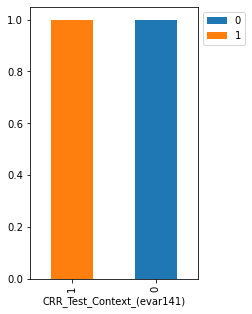

CRR_Test_Context_(evar141)      0      1     All
Login_Status_(evar7)                            
All                         76393  69759  146152
3                           59019  57281  116300
0                           16562  11847   28409
2                             799    622    1421
4                              13      9      22
------------------------------------------------------------------------------------------------------------------------


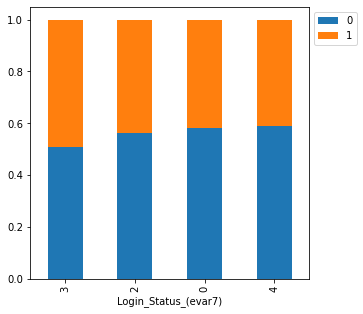

CRR_Test_Context_(evar141)         0      1     All
#_of_Adults_Searched_(evar21)                      
All                            76393  69759  146152
1.0                            39582  37726   77308
2.0                            31385  27227   58612
3.0                             2716   2454    5170
4.0                             1906   1672    3578
6.0                              254    237     491
5.0                              276    223     499
8.0                               73     68     141
7.0                               52     41      93
10.0                              32     23      55
9.0                               28     22      50
18.0                               7     12      19
12.0                              24     12      36
13.0                               9      9      18
20.0                               6      9      15
14.0                               8      8      16
16.0                               8      6      14
17.0        

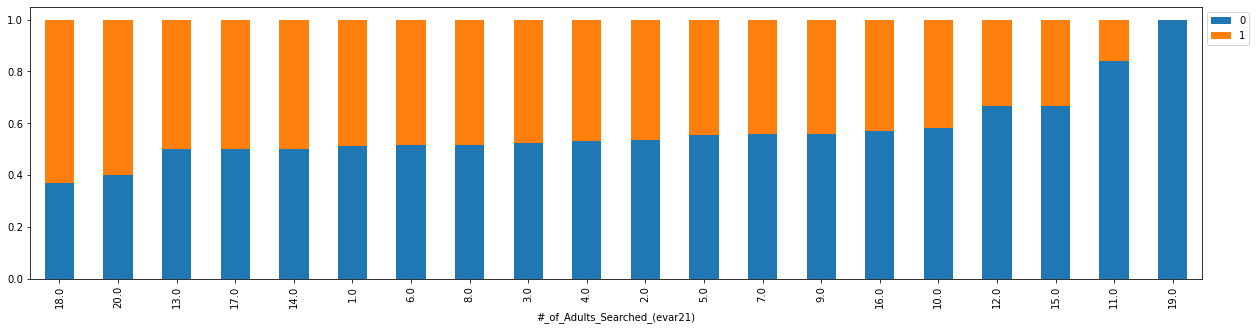

CRR_Test_Context_(evar141)           0      1     All
#_of_Children_Searched_(evar22)                      
All                              76393  69759  146152
0.0                              65850  60442  126292
2.0                               4999   4362    9361
1.0                               4310   3804    8114
3.0                                796    776    1572
4.0                                347    289     636
5.0                                 36     29      65
6.0                                 24     24      48
9.0                                  3      7      10
8.0                                  6      6      12
7.0                                  8      5      13
11.0                                 2      4       6
18.0                                 1      3       4
10.0                                 3      3       6
12.0                                 3      1       4
13.0                                 1      1       2
14.0                        

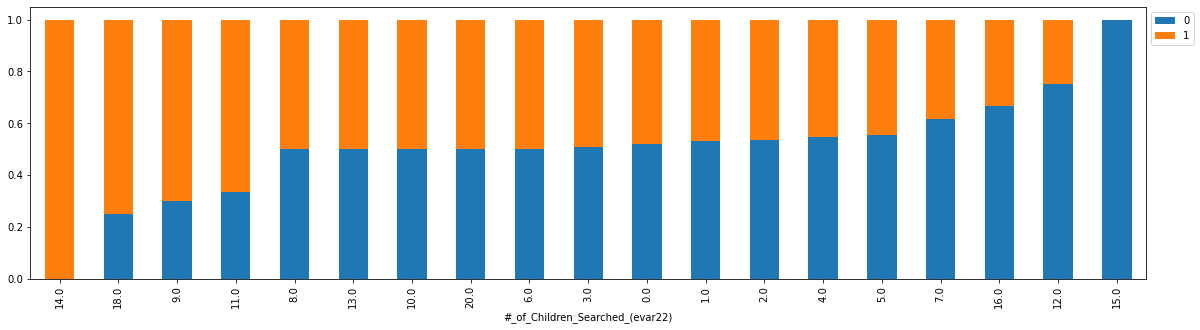

CRR_Test_Context_(evar141)        0      1     All
#_of_Rooms_Searched_(evar23)                      
All                           76393  69759  146152
1.0                           71479  65408  136887
2.0                            3558   3273    6831
3.0                             709    606    1315
4.0                             262    211     473
5.0                             135     89     224
6.0                              98     54     152
9.0                              59     45     104
7.0                              54     41      95
8.0                              39     32      71
------------------------------------------------------------------------------------------------------------------------


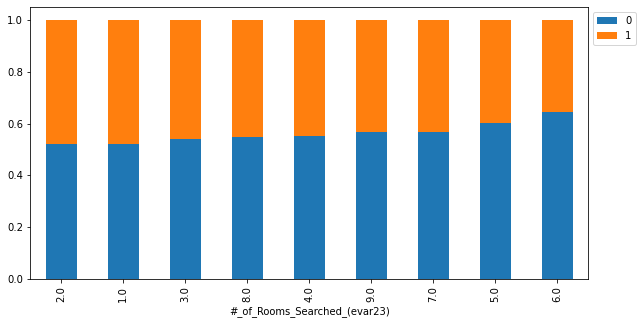

CRR_Test_Context_(evar141)      0      1     All
Accessible                                      
All                         76393  69759  146152
0                           76059  69630  145689
1                             334    129     463
------------------------------------------------------------------------------------------------------------------------


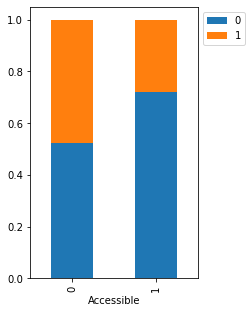

CRR_Test_Context_(evar141)      0      1     All
Length_of_Stay_(evar110)                        
All                         76393  69759  146152
1.0                         44472  40799   85271
2.0                         17250  15887   33137
3.0                          7165   6364   13529
4.0                          3759   3403    7162
5.0                          1532   1340    2872
6.0                           620    551    1171
7.0                           437    472     909
8.0                           183    156     339
9.0                           180    124     304
10.0                          150    103     253
12.0                           96     92     188
11.0                          105     90     195
13.0                           80     85     165
14.0                          111     80     191
15.0                           41     25      66
20.0                           15     23      38
16.0                           15     14      29
18.0                

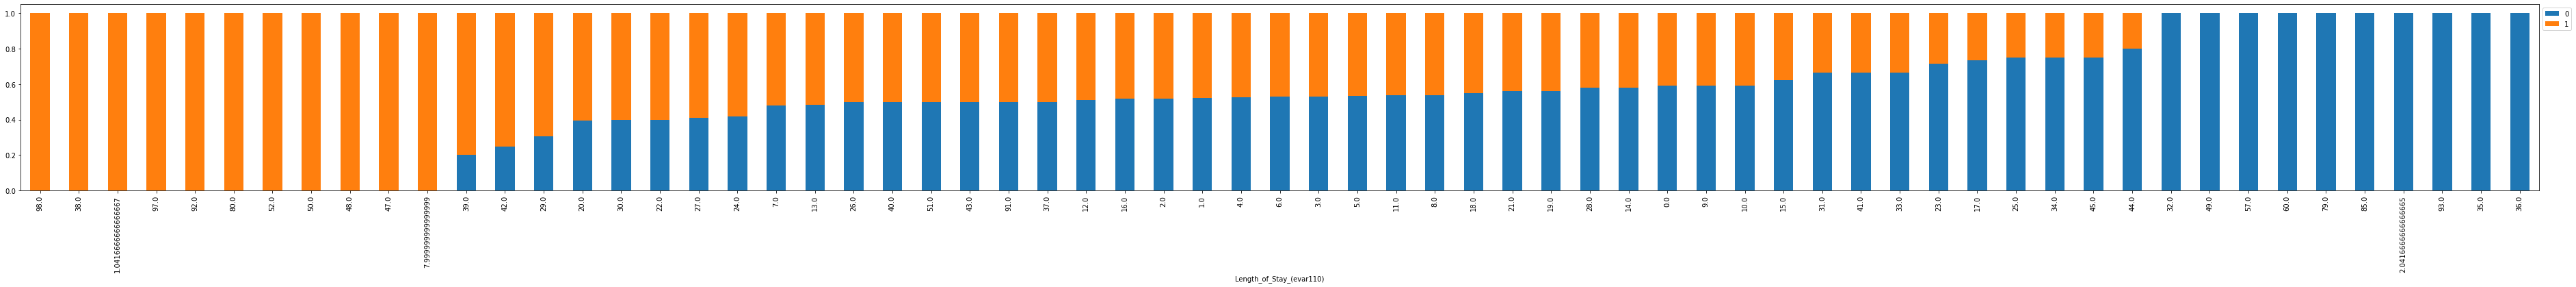

CRR_Test_Context_(evar141)      0      1     All
Platform_(evar1)                                
All                         76393  69759  146152
1                           50747  45294   96041
2                           20424  19677   40101
3                            4049   3637    7686
4                            1173   1151    2324
------------------------------------------------------------------------------------------------------------------------


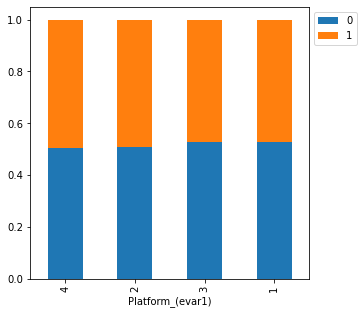

CRR_Test_Context_(evar141)      0      1     All
Member_Level_(evar82)                           
All                         76393  69759  146152
1                           25471  26754   52225
0                           17373  12472   29845
2                           12122  10896   23018
3                           11249  10109   21358
4                           10178   9528   19706
------------------------------------------------------------------------------------------------------------------------


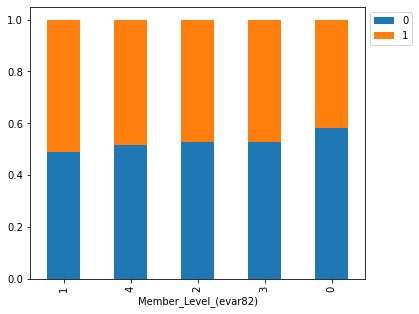

CRR_Test_Context_(evar141)      0      1     All
Room_Nights_Booked                              
All                         76393  69759  146152
1                           42029  38548   80577
2                           17834  16542   34376
3                            6941   6183   13124
4                            4441   4047    8488
5                            1444   1272    2716
6                            1181   1004    2185
7                             427    462     889
8                             488    403     891
9                             281    222     503
12                            222    209     431
10                            263    192     455
14                            140    109     249
11                             95     84     179
13                             72     76     148
16                             59     61     120
15                             95     57     152
20                             37     40      77
18                  

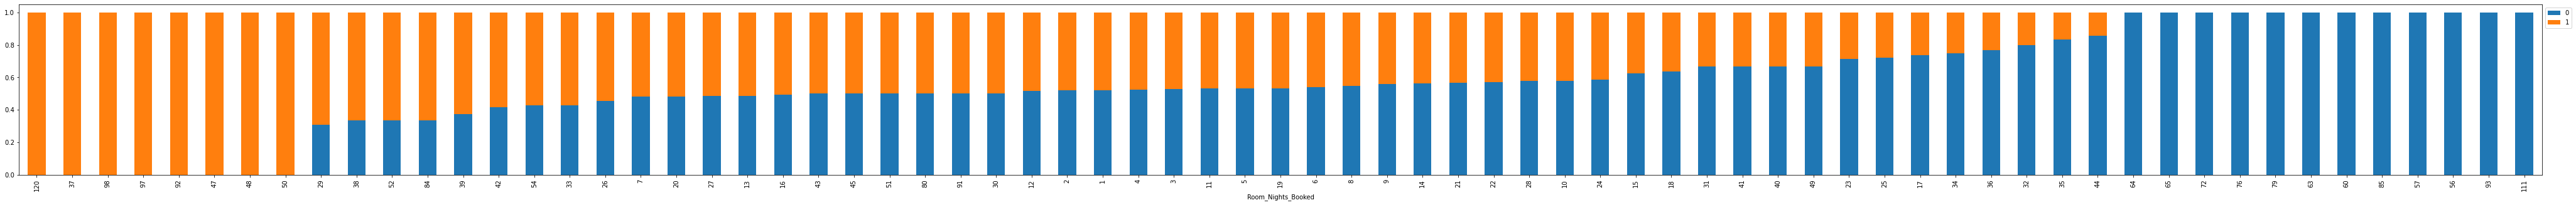

CRR_Test_Context_(evar141)        0      1     All
Quick_Enrollments_(event155)                      
All                           76393  69759  146152
0                             68407  58933  127340
1                              7986  10826   18812
------------------------------------------------------------------------------------------------------------------------


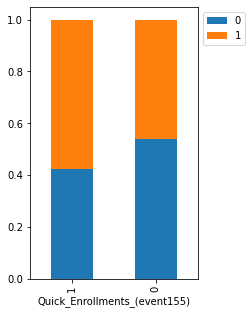

CRR_Test_Context_(evar141)      0      1     All
More_Adult_Count_Search                         
All                         76393  69759  146152
1                           75589  69079  144668
0                             804    680    1484
------------------------------------------------------------------------------------------------------------------------


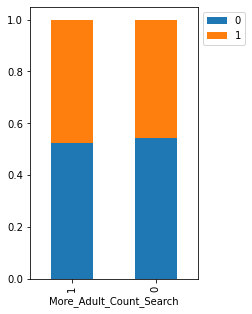

CRR_Test_Context_(evar141)      0      1     All
More_Child_Count_Search                         
All                         76393  69759  146152
1                           76302  69673  145975
0                              91     86     177
------------------------------------------------------------------------------------------------------------------------


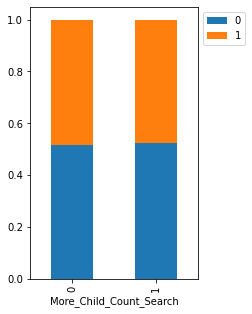

CRR_Test_Context_(evar141)      0      1     All
More_Room_Count_Search                          
All                         76393  69759  146152
1                           75746  69287  145033
0                             647    472    1119
------------------------------------------------------------------------------------------------------------------------


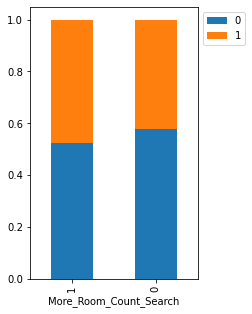

CRR_Test_Context_(evar141)      0      1     All
Extended_Length_of_Stay                         
All                         76393  69759  146152
1                           75249  68827  144076
0                            1144    932    2076
------------------------------------------------------------------------------------------------------------------------


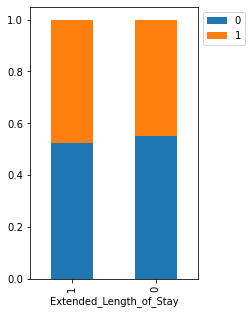

CRR_Test_Context_(evar141)      0      1     All
Extended_Rooms_Booked                           
All                         76393  69759  146152
1                           74297  68058  142355
0                            2096   1701    3797
------------------------------------------------------------------------------------------------------------------------


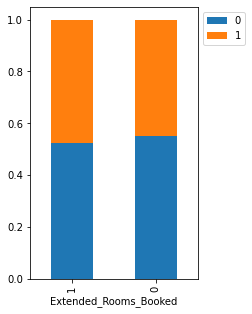

<IPython.core.display.Javascript object>

In [219]:
skip_cols=["Bookings","Revenue"]
for colname in num_col:
       if colname not in skip_cols:
            stacked_barplot(data, colname, "CRR_Test_Context_(evar141)")


### Loading necessary libraries for Clustering

In [227]:
%%time
# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import (
    KElbowVisualizer,
    SilhouetteVisualizer,
    InterclusterDistance,
)

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import pdist

# to perform PCA
from sklearn.decomposition import PCA

CPU times: user 73 µs, sys: 3 µs, total: 76 µs
Wall time: 83 µs


<IPython.core.display.Javascript object>

### Scaling the data set


In [228]:
%%time
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

CPU times: user 33.2 ms, sys: 5.78 ms, total: 39 ms
Wall time: 36.9 ms


<IPython.core.display.Javascript object>

In [229]:
subset_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRR_Test_Context_(evar141),146152.0,-6.182877e-14,1.000003,-0.955594,-0.955594,-0.955594,1.046470,1.046470
Login_Status_(evar7),146152.0,6.616368e-15,1.000003,-2.028753,0.499510,0.499510,0.499510,1.342265
#_of_Adults_Searched_(evar21),146152.0,-3.705516e-15,1.000003,-0.653933,-0.653933,-0.653933,0.423742,19.821897
#_of_Children_Searched_(evar22),146152.0,-1.340144e-14,1.000003,-0.343864,-0.343864,-0.343864,-0.343864,28.069645
#_of_Rooms_Searched_(evar23),146152.0,3.210037e-15,1.000003,-0.199389,-0.199389,-0.199389,-0.199389,15.950865
Accessible,146152.0,2.340640e-14,1.000003,-0.056374,-0.056374,-0.056374,-0.056374,17.738745
Length_of_Stay_(evar110),146152.0,-1.436758e-15,1.000003,-0.912390,-0.430685,-0.430685,0.051021,46.294751
Platform_(evar1),146152.0,1.372925e-15,1.000003,-0.640279,-0.640279,-0.640279,0.858288,3.855423
Member_Level_(evar82),146152.0,-2.176462e-15,1.000003,-1.251927,-0.493209,-0.493209,1.024227,1.782945
Bookings,146152.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

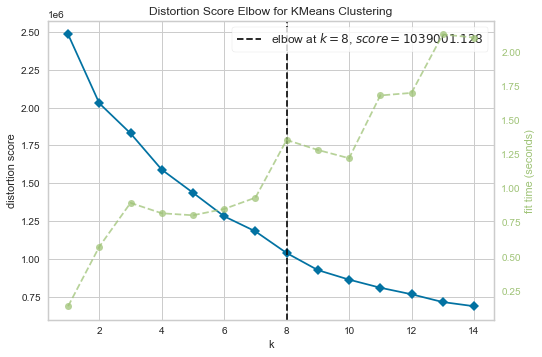

CPU times: user 38.9 s, sys: 33.9 s, total: 1min 12s
Wall time: 16.9 s


<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [239]:
%%time
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 15))
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

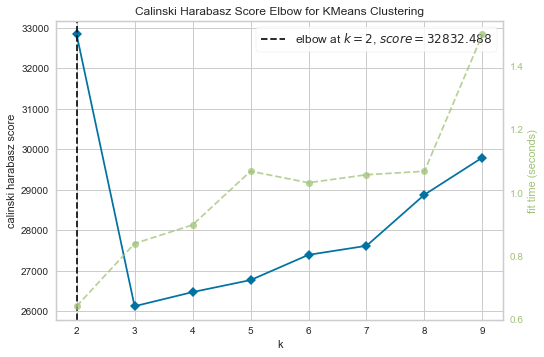

CPU times: user 19.4 s, sys: 16.6 s, total: 36 s
Wall time: 8.36 s


<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

<IPython.core.display.Javascript object>

In [236]:
%%time
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10), metric="calinski_harabasz")
visualizer.fit(subset_scaled_df)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure


### K-means Clustering - Model  K=2, Clustering customers in 2 different segments

In [240]:
%%time
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(subset_scaled_df)
# adding kmeans cluster labels to the original and scaled dataframes
data["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

CPU times: user 1.15 s, sys: 934 ms, total: 2.08 s
Wall time: 542 ms


<IPython.core.display.Javascript object>

In [246]:
cluster_profile = data.groupby("K_means_segments").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")["Quick_Enrollments_(event155)"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,CRR_Test_Context_(evar141),Login_Status_(evar7),#_of_Adults_Searched_(evar21),#_of_Children_Searched_(evar22),#_of_Rooms_Searched_(evar23),Accessible,Length_of_Stay_(evar110),Platform_(evar1),Member_Level_(evar82),Bookings,Revenue,Room_Nights_Booked,Quick_Enrollments_(event155),More_Adult_Count_Search,More_Child_Count_Search,More_Room_Count_Search,Extended_Length_of_Stay,Extended_Rooms_Booked,count_in_each_segments
K_means_segments,,,,,,,,,,,,,,,,,,,
0,0.478274,2.418836,1.574591,0.241469,1.056049,0.003170,1.702800,1.433109,1.653972,1.000000,225.412700,1.786408,0.129702,0.993751,0.999190,0.999923,1.000000,0.999979,141948
1,0.444577,2.017364,2.694339,0.261418,2.541151,0.003092,8.352759,1.229781,1.517840,1.000000,1623.738623,12.818982,0.095385,0.857992,0.985252,0.736441,0.506185,0.097526,4204


<IPython.core.display.Javascript object>

In [247]:
# Summary for Cluster 0

data[data["K_means_segments"] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
CRR_Test_Context_(evar141),141948.0,0.478274,0.499530,0.0,0.00,0.0,1.0000,1.0
Login_Status_(evar7),141948.0,2.418836,1.177965,0.0,3.00,3.0,3.0000,4.0
#_of_Adults_Searched_(evar21),141948.0,1.574591,0.759836,1.0,1.00,1.0,2.0000,16.0
#_of_Children_Searched_(evar22),141948.0,0.241469,0.674179,0.0,0.00,0.0,0.0000,10.0
#_of_Rooms_Searched_(evar23),141948.0,1.056049,0.258048,1.0,1.00,1.0,1.0000,4.0
Accessible,141948.0,0.003170,0.056215,0.0,0.00,0.0,0.0000,1.0
Length_of_Stay_(evar110),141948.0,1.702800,1.104822,0.0,1.00,1.0,2.0000,7.0
Platform_(evar1),141948.0,1.433109,0.669042,1.0,1.00,1.0,2.0000,4.0
Member_Level_(evar82),141948.0,1.653972,1.315411,0.0,1.00,1.0,3.0000,4.0
Bookings,141948.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


<IPython.core.display.Javascript object>

In [266]:
# Summary for Cluster 1

data[data["K_means_segments"] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
CRR_Test_Context_(evar141),4204.0,0.444577,0.496978,0.0,0.00,0.00,1.0,1.0
Login_Status_(evar7),4204.0,2.017364,1.393002,0.0,0.00,3.00,3.0,4.0
#_of_Adults_Searched_(evar21),4204.0,2.694339,3.037173,1.0,1.00,2.00,3.0,20.0
#_of_Children_Searched_(evar22),4204.0,0.261418,1.370442,0.0,0.00,0.00,0.0,20.0
#_of_Rooms_Searched_(evar23),4204.0,2.541151,2.034901,1.0,1.00,2.00,4.0,9.0
Accessible,4204.0,0.003092,0.055529,0.0,0.00,0.00,0.0,1.0
Length_of_Stay_(evar110),4204.0,8.352759,8.103980,1.0,3.00,7.00,11.0,98.0
Platform_(evar1),4204.0,1.229781,0.571766,1.0,1.00,1.00,1.0,4.0
Member_Level_(evar82),4204.0,1.517840,1.396919,0.0,0.00,1.00,3.0,4.0
Bookings,4204.0,1.000000,0.000000,1.0,1.00,1.00,1.0,1.0


<IPython.core.display.Javascript object>

In [267]:
data[data["K_means_segments"] == 1]["CRR_Test_Context_(evar141)"].value_counts()

0    2335
1    1869
Name: CRR_Test_Context_(evar141), dtype: int64

<IPython.core.display.Javascript object>

In [268]:
data[data["K_means_segments"] == 0]["CRR_Test_Context_(evar141)"].value_counts()

0    74058
1    67890
Name: CRR_Test_Context_(evar141), dtype: int64

<IPython.core.display.Javascript object>